In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore') 

sales_df = pd.read_csv( 'datasets/Advertising.csv' ) 

# first few records
sales_df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
X = sales_df[['TV', 'Radio', 'Newspaper']] 
Y = sales_df['Sales'] 

In [4]:
# Standardize X & Y

Y = np.array( (Y - Y.mean() ) / Y.std() ) 

X = X.apply( lambda rec: ( rec - rec.mean() ) / rec.std(), axis = 0 ) 

In [5]:
X.head()

,TV,Radio,Newspaper
0,0.967425,0.979066,1.774493
1,-1.194379,1.080097,0.667903
2,-1.512360,1.524637,1.779084
3,0.051919,1.214806,1.283185
4,0.393196,-0.839507,1.278593


## Implementing the Gradient Descent Algorithm

#### Step 1: Random Initialization of the bias and weights

In [10]:
import random

#dim - is the number of weights to be initialized besides the bias
def initialize( dim ): 
 # For reproducible results, the seed it set to 42.
 # Reader can comment the following two lines
 # and try other initialiazation values.
 np.random.seed(seed=42) 
 random.seed(42) 
 #Initialize the bias
 b = random.random() 
 #Initialize the weights.
 w = np.random.rand( dim ) 
 return b, w 

In [11]:
b, w = initialize( 3 ) 
print( "Bias: ", b, " Weights: ", w ) 

Bias:  0.6394267984578837  Weights:  [0.37454012 0.95071431 0.73199394]


##Step 2: Predict Y values from the bias and weights

In [12]:
# Inputs:
# b - bias
# w - weights
# X - the input matrix
def predict_Y( b, w, X ): 
    return b + np.dot( X, w ) 

In [13]:
b, w = initialize( 3 ) 
Y_hat = predict_Y( b, w, X) 
Y_hat[0:10] 

array([ 3.23149557,  1.70784873,  2.82476076,  2.75309026,  0.92448558,
        3.17136498,  0.62234399, -0.34935444, -2.313095  , -0.76802983])

##Step 3: Calculate the cost function: MSE

In [14]:
# import math
# Inputs
# Y - Actual values of y
# Y_hat - predicted value of y
def get_cost( Y, Y_hat ): 
     # Calculating the residuals from taking difference between actual and predicted values
    Y_resid = Y - Y_hat 
     # Matrix multiplication with self will give the square values
     #Then takin the sum and dividing by number of examples to calculate mean
    return np.sum( np.dot( Y_resid.T, Y_resid ) ) / len( Y_resid ) 

In [15]:
b, w = initialize( 3 ) 
Y_hat = predict_Y( b, w, X) 
get_cost( Y, Y_hat )

1.5303100198505895

##Step4: Update the bias and weights

In [16]:
def update_beta( x, y, y_hat, b_0, w_0, learning_rate ): 
 #gradient of bias
 db = (np.sum( y_hat - y ) * 2) / len(y) 
 #gradient of weights
 dw = (np.dot( ( y_hat - y ), x ) * 2 ) / len(y) 
 #update bias
 b_1 = b_0 - learning_rate * db 
 #update beta
 w_1 = w_0 - learning_rate * dw 
 #return the new bias and beta values
 return b_1, w_1 

In [17]:
b, w = initialize( 3 ) 
print( "After Initialization - Bias: ", b, " Weights: ", w ) 
Y_hat = predict_Y( b, w, X) 
b, w = update_beta( X, Y, Y_hat, b, w, 0.01 ) 
print( "After first update - Bias: ", b, " Weights: ", w ) 

After Initialization - Bias:  0.6394267984578837  Weights:  [0.37454012 0.95071431 0.73199394]
After first update - Bias:  0.6266382624887261  Weights:  [0.38079093 0.9376953  0.71484883]


##Step5 Finding the optimal bias and weights

In [18]:
def run_gradient_descent( X, Y, alpha = 0.01, num_iterations = 100): 
    # Intialize the bias and weights
    b, w = initialize( X.shape[1] ) 
    iter_num = 0 
    # gd_iterations_df keeps track of the cost every 10 iterations
    gd_iterations_df = pd.DataFrame(columns = ['iteration', 'cost']) 
    result_idx = 0 
    # Run the iterations in loop
    for each_iter in range(num_iterations): 
        # Calcuated predicted value of y
        Y_hat = predict_Y( b, w, X ) 
        
        # Calculate the cost
        this_cost = get_cost( Y, Y_hat ) 
        
        # Save the previous bias and weights
        prev_b = b 
        prev_w = w 
        
        # Update and calculate the new values of bias and weights
        b, w = update_beta( X, Y, Y_hat, prev_b, prev_w, alpha)
        
        # For every 10 iterations, store the cost i.e. MSE
        if( iter_num % 10 == 0 ): 
            gd_iterations_df.loc[result_idx] = [iter_num, this_cost]
            result_idx = result_idx + 1 
            
        iter_num += 1 
        
    print( "Final estimate of b and w: ", b, w ) 
    
    #return the final bias, weights and the cost at the end
    return gd_iterations_df, b, w 

In [19]:
gd_iterations_df, b, w = run_gradient_descent( X, Y, alpha = 0.001, num_iterations = 200 ) 

Final estimate of b and w:  0.42844895817391493 [0.48270238 0.75265969 0.46109174]


In [20]:
gd_iterations_df[0:10]

,iteration,cost
0,0.0,1.530310
1,10.0,1.465201
2,20.0,1.403145
3,30.0,1.343996
4,40.0,1.287615
5,50.0,1.233868
6,60.0,1.182630
7,70.0,1.133780
8,80.0,1.087203
9,90.0,1.042793


### Plotting the cost function against the iterations

In [21]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

Text(0, 0.5, 'Cost or MSE')

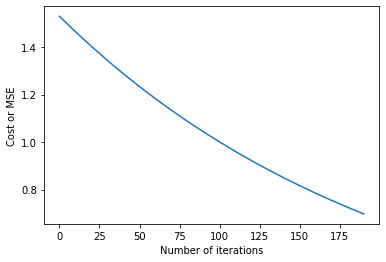

In [23]:
plt.plot( gd_iterations_df['iteration'], gd_iterations_df['cost'] ); 
plt.xlabel("Number of iterations") 
plt.ylabel("Cost or MSE")

In [24]:
print( "Final estimates of b and w: ", b, w )

Final estimates of b and w:  0.42844895817391493 [0.48270238 0.75265969 0.46109174]


In [25]:
alpha_df_1, b, w = run_gradient_descent( X, Y, alpha = 0.1, num_iterations = 2000 )

Final estimate of b and w:  2.7998165435548547e-16 [ 0.75306591  0.53648155 -0.00433069]


In [26]:
alpha_df_2, b, w = run_gradient_descent( X, Y, alpha = 0.01, num_iterations = 2000 )

Final estimate of b and w:  2.7728016698178713e-16 [ 0.75306591  0.53648155 -0.00433069]


In [27]:
#change the learning parameter and use smaller value e.g. 0.001.
alpha_df_3, b, w = run_gradient_descent( X, Y, alpha = 0.001, num_iterations = 2000 ) 

Final estimate of b and w:  0.011664695556930518 [0.74315125 0.52779959 0.01171703]


In [28]:
alpha_df_4, b, w = run_gradient_descent( X, Y, alpha = 0.001, num_iterations = 20000 ) 

Final estimate of b and w:  2.7761821701419657e-16 [ 0.75306591  0.53648155 -0.00433069]


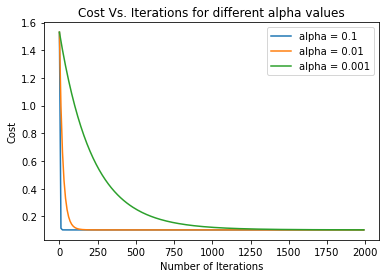

In [30]:
plt.plot( alpha_df_1['iteration'], alpha_df_1['cost'], label = "alpha = 0.1" );
plt.plot( alpha_df_2['iteration'], alpha_df_2['cost'], label = "alpha = 0.01" ); 
plt.plot( alpha_df_3['iteration'], alpha_df_3['cost'], label = "alpha = 0.001" ); 
# plt.plot( alpha_df_4['iteration'], alpha_df_4['cost'], label = "alpha = 0.001 and iter=20000" ); 
plt.legend() 
plt.ylabel('Cost'); 
plt.xlabel('Number of Iterations'); 
plt.title('Cost Vs. Iterations for different alpha values'); 

In [31]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( sales_df[["TV", "Radio", "Newspaper"]], sales_df.Sales, test_size=0.3, 
random_state = 42 ) # Seed value of 42 for reproducibility

In [32]:
#Building Linear Regression model with train dataset
len( X_train ) 

140

In [33]:
len( X_test) 

60

In [34]:
from sklearn.linear_model import LinearRegression
## Initiliazing the model
linreg = LinearRegression() 
# Fitting training data to the model
linreg.fit( X_train, y_train ) 

LinearRegression()

In [35]:
linreg.intercept_ 

2.708949092515912

In [36]:
linreg.coef_ 

array([0.04405928, 0.1992875 , 0.00688245])

In [50]:
list( zip( ["TV", "Radio", "Newspaper"], list( linreg.coef_ ) ) )

[('TV', 0.0440592809574652),
 ('Radio', 0.1992874968989395),
 ('Newspaper', 0.0068824522222754)]

In [51]:
# Predicting the y value from the test set
y_pred = linreg.predict( X_test )

In [52]:
# Creating a DataFrame with three columns named actual, predicted and residuals to store
# the respective values
test_pred_df = pd.DataFrame( { 'actual': y_test, 'predicted': np.round( y_pred, 2), 'residuals': y_test - y_pred } ) 
# Randomly showing the 10 observations from the DataFrame
test_pred_df.sample(10)

,actual,predicted,residuals
126,6.6,11.15,-4.553147
170,8.4,7.35,1.049715
95,16.9,16.57,0.334604
195,7.6,5.22,2.375645
115,12.6,13.36,-0.755569
38,10.1,10.17,-0.070454
56,5.5,8.92,-3.415494
165,11.9,14.30,-2.402060
173,11.7,11.63,0.068431
9,10.6,12.18,-1.576049


In [53]:
## Importing metrics from sklearn
from sklearn import metrics

In [54]:
## y_train contain the actual value and the predicted value is returned from
# predict() method after passing the X values of the training data.
r2 = metrics.r2_score( y_train, linreg.predict(X_train) ) 
print("R Sqaured: ", r2) 

R Sqaured:  0.9055159502227753


In [55]:
# y_pred contains predicted value of test data
mse = metrics.mean_squared_error( y_test, y_pred ) 

In [56]:
# Taking square root of MSE and then round off to two decimal values
rmse = round( np.sqrt(mse), 2 ) 
print("RMSE Test: ", rmse) 

RMSE:  1.95


In [58]:
# y_pred contains predicted value of train data
mse = metrics.mean_squared_error( y_train, linreg.predict(X_train) ) 

In [59]:
# Taking square root of MSE and then round off to two decimal values
rmse = round( np.sqrt(mse), 2 ) 
print("RMSE Train: ", rmse) 

RMSE:  1.57
